In [1]:
import pandas as pd
import seaborn
import pytry

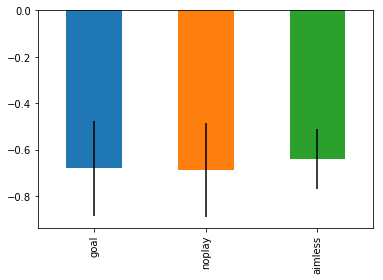

In [2]:
data = pd.DataFrame(pytry.read('2D_results'))

results_goal = pd.DataFrame({'goal': pd.concat([data.gtr_0, data.gtr_1, data.gtr_2, data.gtr_3, data.gtr_4, data.gtr_5, 
                                          data.gtr_6, data.gtr_7, data.gtr_8, data.gtr_9, data.gtst_0, data.gtst_1, 
                                          data.gtst_2], ignore_index=True)}).sort_index()
results_noplay = pd.DataFrame({'noplay': pd.concat([data.ntr_0, data.ntr_1, data.ntr_2, data.ntr_3, data.ntr_4, data.ntr_5, 
                               data.ntr_6, data.ntr_7, data.ntr_8, data.ntr_9, data.ntr_10, data.ntr_11, 
                               data.ntr_12, data.ntr_13, data.ntr_14, data.ntr_15, data.ntr_16, data.ntr_17, 
                               data.ntr_18, data.ntr_19, data.ntst_0, data.ntst_1, data.ntst_2, data.ntst_3, 
                               data.ntst_4], ignore_index=True)}).sort_index()
results_aimless = pd.DataFrame({'aimless': pd.concat([data.aim_0, data.aim_1, data.aim_2, data.aim_3, data.aim_4, 
                                                      data.aim_5, data.aim_6, data.aim_7, data.aim_8, data.aim_9, 
                                                     data.aim_10, data.aim_11, data.aim_12, data.aim_13, data.aim_14, 
                                                     data.aim_15, data.aim_16, data.aim_17, data.aim_18, data.aim_19,
                                                     data.aim_20], ignore_index=True)}).sort_index()

all = [results_goal, results_noplay, results_aimless]

result = pd.concat(all, sort=False, ignore_index=True)

#print(result)
errors = result.std()
result.mean().plot(kind='bar', yerr=errors)


In [ ]:
model = nengo.Network()
model.networks.append(net)
with model:
    stim = nengo.Node(nengo.processes.PresentInput(train_all, 
                                                   presentation_time=presentation_time_train))
    for i in range(D):
        nengo.Connection(stim[i], rw[i].input, synapse=None)
        
    ideal_results = [1.0, -1.0]
    def ideal_func(t):
        return ideal_results[int(t/5) % len(ideal_results)]
    ideal_result = nengo.Node(ideal_func)
    
    result2 = nengo.Node(None, size_in=1)
    nengo.Connection(pool, result2, eval_points=sim.data[p_pool], function=sim.data[p_ideal], scale_eval_points=False)
    
    p_result = nengo.Probe(result)
    p_result2 = nengo.Probe(result2)
    p_stim = nengo.Probe(stim)
    
sim2 = nengo.Simulator(model)
sim2.run(10)

In [ ]:
model = nengo.Network()
model.networks.append(net)
with model:
    offsets = [-np.pi/2, np.pi]
    def stim_func(t):
        offset = offsets[int(t/5) % len(offsets)]
        return np.sin(t*np.pi), np.sin(t*np.pi+offset)

    ideal_results = [1.0, -1.0]
    def ideal_func(t):
        return ideal_results[int(t/5) % len(ideal_results)]
    ideal_result = nengo.Node(ideal_func)
    
    
    
    stim = nengo.Node(stim_func)
    for i in range(D):
        nengo.Connection(stim[i], rw[i].input, synapse=None)
    
    p_result = nengo.Probe(result)
    p_stim = nengo.Probe(stim)
    p_pool = nengo.Probe(pool)
    p_ideal = nengo.Probe(ideal_result)